In [1]:
import numpy as np
import pandas as pd
from itertools import combinations

In [2]:
raw_df = pd.read_csv("./example_2.csv")

In [3]:
df = raw_df.copy()
df["stock_code"] = df["stock_code"].apply(lambda x: str(x).zfill(6))
df.set_index("stock_code", inplace=True)

In [4]:
"""
데이터를 간단히 설명
    - 재무제표 기반의 주요 지표 추출
    cpbr    :current PBR            : 유동 PBR
    tpbr    :total PBR              : 총합 PBR
    ctr     :current total ratio    : 유동성
    npr     :net profit ratio       : 당기순이익 비율
    opr     :operation profit ratio : 영업이익 비율
    
    profit : 재무제표 발표후 3달간 수익률
"""

""

''

In [5]:
df.head(3)

,cpbr,tpbr,ctr,npr,opr,profit
stock_code,,,,,,
032640,0.115971,1.425265,0.081368,0.035630,0.066044,0.060770
007690,0.567679,1.520625,0.373319,0.027165,0.040628,0.561364
010060,0.671818,1.362474,0.493087,-0.125424,-0.043018,0.141809


In [6]:
factors = ["cpbr", "tpbr", "ctr", "npr", "opr"]
target = ["profit"]

In [7]:
factor_df = df.loc[:, factors]
target_df = df.loc[:, target].rename(columns={"profit": "target"})

df = pd.concat(
    [factor_df, target_df],
    axis=1,
)

In [8]:
# 1d
qct_n = 5

qct_factor_df = pd.concat(
    [pd.qcut(x=df[col], q=qct_n, labels=False) for col in factors],
    axis=1,
)

qct_df = pd.concat([qct_factor_df, target_df], axis=1)

analysis_list = list()
for factor in factors:
    tmp = pd.concat(
        [
            qct_df.groupby([factor])["target"].mean().rename("mean"),
            qct_df.groupby([factor])["target"].var().rename("var"),
            qct_df.groupby([factor])["target"].size().rename("count"),
        ],
        axis=1,
    )

    tmp["factor"] = [{tmp.index.name: idx} for idx in tmp.index]
    tmp.reset_index(drop=True)
    analysis_list.append(tmp)
analysis_1d = pd.concat(analysis_list, axis=0)

In [9]:
analysis_1d.nlargest(10, "mean")

,mean,var,count,factor
4,0.196750,0.063217,334,{'tpbr': 4}
4,0.169226,0.046309,334,{'cpbr': 4}
2,0.166363,0.104363,333,{'opr': 2}
2,0.160718,0.098448,333,{'npr': 2}
3,0.140064,0.046366,333,{'tpbr': 3}
2,0.122874,0.082538,333,{'ctr': 2}
3,0.120873,0.092902,333,{'cpbr': 3}
1,0.116485,0.065186,333,{'ctr': 1}
0,0.114907,0.069848,334,{'cpbr': 0}
0,0.108767,0.072193,334,{'ctr': 0}


In [10]:
# 2d

qct_n = 5

qct_factor_df = pd.concat(
    [pd.qcut(x=df[col], q=qct_n, labels=False) for col in factors],
    axis=1,
)

qct_df = pd.concat([qct_factor_df, target_df], axis=1)

from itertools import combinations

factor_combs = list(combinations(factors, 2))

analysis_list = list()
for factor_comb in factor_combs:
    tmp = pd.concat(
        [
            qct_df.groupby(list(factor_comb))["target"].mean().rename("mean"),
            qct_df.groupby(list(factor_comb))["target"].var().rename("var"),
            qct_df.groupby(list(factor_comb))["target"].size().rename("count"),
        ],
        axis=1,
    )
    tmp["factor"] = [
        {tmp.index.names[0]: index[0], tmp.index.names[1]: index[1]} for index in tmp.index
    ]
    tmp.reset_index(drop=True, inplace=True)
    analysis_list.append(tmp)
analysis_2d = pd.concat(analysis_list, axis=0)
analysis_2d

,mean,var,count,factor
0,0.029731,0.079697,62,"{'cpbr': 0, 'tpbr': 0}"
1,0.063677,0.058752,62,"{'cpbr': 0, 'tpbr': 1}"
2,0.104697,0.056350,59,"{'cpbr': 0, 'tpbr': 2}"
3,0.146845,0.051868,68,"{'cpbr': 0, 'tpbr': 3}"
4,0.197894,0.083058,83,"{'cpbr': 0, 'tpbr': 4}"
...,...,...,...,...
20,0.090841,0.028263,20,"{'npr': 4, 'opr': 0}"
21,0.114935,0.098900,14,"{'npr': 4, 'opr': 1}"
22,0.359182,0.415146,15,"{'npr': 4, 'opr': 2}"
23,0.086524,0.026862,44,"{'npr': 4, 'opr': 3}"


In [11]:
analysis_2d.nlargest(10, "mean")

,mean,var,count,factor
15,0.514779,0.188581,3,"{'npr': 3, 'opr': 0}"
22,0.359182,0.415146,15,"{'npr': 4, 'opr': 2}"
17,0.267358,0.235909,66,"{'cpbr': 3, 'npr': 2}"
17,0.252390,0.089831,84,"{'cpbr': 4, 'ctr': 2}"
16,0.249003,0.041307,11,"{'cpbr': 4, 'ctr': 1}"
22,0.244050,0.096513,97,"{'tpbr': 4, 'opr': 2}"
22,0.237536,0.087729,82,"{'tpbr': 4, 'ctr': 2}"
22,0.237385,0.102235,91,"{'tpbr': 4, 'npr': 2}"
17,0.231932,0.260573,68,"{'cpbr': 3, 'opr': 2}"
12,0.221003,0.109450,38,"{'cpbr': 3, 'ctr': 1}"


In [12]:
analysis_2d[analysis_2d["count"] > 10].nlargest(10, "mean")

,mean,var,count,factor
22,0.359182,0.415146,15,"{'npr': 4, 'opr': 2}"
17,0.267358,0.235909,66,"{'cpbr': 3, 'npr': 2}"
17,0.252390,0.089831,84,"{'cpbr': 4, 'ctr': 2}"
16,0.249003,0.041307,11,"{'cpbr': 4, 'ctr': 1}"
22,0.244050,0.096513,97,"{'tpbr': 4, 'opr': 2}"
22,0.237536,0.087729,82,"{'tpbr': 4, 'ctr': 2}"
22,0.237385,0.102235,91,"{'tpbr': 4, 'npr': 2}"
17,0.231932,0.260573,68,"{'cpbr': 3, 'opr': 2}"
12,0.221003,0.109450,38,"{'cpbr': 3, 'ctr': 1}"
22,0.205108,0.050743,186,"{'cpbr': 4, 'tpbr': 4}"


In [13]:
# 3d
qct_n = 5

qct_factor_df = pd.concat(
    [pd.qcut(x=df[col], q=qct_n, labels=False) for col in factors],
    axis=1,
)

qct_df = pd.concat([qct_factor_df, target_df], axis=1)

from itertools import combinations

factor_combs = list(combinations(factors, 3))

analysis_list = list()
for factor_comb in factor_combs:
    tmp = pd.concat(
        [
            qct_df.groupby(list(factor_comb))["target"].mean().rename("mean"),
            qct_df.groupby(list(factor_comb))["target"].var().rename("var"),
            qct_df.groupby(list(factor_comb))["target"].size().rename("count"),
        ],
        axis=1,
    )
    tmp["factor"] = [
        {
            tmp.index.names[0]: index[0],
            tmp.index.names[1]: index[1],
            tmp.index.names[2]: index[2],
        }
        for index in tmp.index
    ]
    tmp.reset_index(drop=True, inplace=True)
    analysis_list.append(tmp)
analysis_3d = pd.concat(analysis_list, axis=0)

In [14]:
analysis_3d.nlargest(10, "mean")

,mean,var,count,factor
66,1.421676,2.967005,2,"{'tpbr': 2, 'npr': 4, 'opr': 2}"
86,1.046363,1.916030,3,"{'ctr': 3, 'npr': 4, 'opr': 2}"
59,1.015989,NaN,1,"{'ctr': 2, 'npr': 3, 'opr': 0}"
28,0.878321,NaN,1,"{'cpbr': 1, 'ctr': 3, 'npr': 3}"
48,0.851380,NaN,1,"{'tpbr': 2, 'npr': 0, 'opr': 3}"
89,0.770033,1.565458,4,"{'cpbr': 3, 'npr': 4, 'opr': 2}"
75,0.754912,NaN,1,"{'cpbr': 4, 'ctr': 1, 'npr': 1}"
49,0.653453,NaN,1,"{'cpbr': 2, 'npr': 0, 'opr': 2}"
102,0.646632,0.272849,2,"{'cpbr': 4, 'npr': 3, 'opr': 0}"
100,0.633531,0.292549,2,"{'tpbr': 4, 'npr': 3, 'opr': 0}"


In [15]:
analysis_3d[analysis_3d["count"] > 10].nlargest(10, "mean")

,mean,var,count,factor
57,0.391969,0.270616,11,"{'cpbr': 3, 'ctr': 1, 'npr': 2}"
58,0.353925,0.240663,14,"{'cpbr': 3, 'ctr': 1, 'opr': 2}"
102,0.353680,0.194621,16,"{'tpbr': 4, 'ctr': 0, 'npr': 2}"
72,0.335151,0.267671,14,"{'cpbr': 3, 'ctr': 4, 'opr': 1}"
93,0.334989,0.286438,12,"{'cpbr': 3, 'tpbr': 4, 'opr': 2}"
83,0.323850,0.297438,25,"{'cpbr': 3, 'tpbr': 2, 'npr': 2}"
102,0.321625,0.127804,21,"{'tpbr': 4, 'ctr': 0, 'opr': 2}"
22,0.319595,0.159895,20,"{'cpbr': 0, 'tpbr': 4, 'npr': 2}"
83,0.311214,0.452017,29,"{'cpbr': 3, 'tpbr': 2, 'opr': 2}"
62,0.304657,0.403713,16,"{'tpbr': 2, 'ctr': 2, 'npr': 2}"


In [16]:
from typing import List
import pandas as pd


def analyze_factors(df: pd.DataFrame, factors: List[str], target: str, n_d: int, qct_n: int):
    """Analyser"""
    qct_factor_df = pd.concat(
        [pd.qcut(x=df[col], q=qct_n, labels=False) for col in factors], axis=1
    )
    qct_df = pd.concat([qct_factor_df, df[target]], axis=1)

    factor_combs = list(combinations(factors, n_d))

    analysis_list = []
    for factor_comb in factor_combs:
        tmp = pd.concat(
            [
                qct_df.groupby(list(factor_comb))[target].mean().rename("mean"),
                qct_df.groupby(list(factor_comb))[target].var().rename("var"),
                qct_df.groupby(list(factor_comb))[target].size().rename("count"),
            ],
            axis=1,
        )

        if n_d > 1:
            tmp["factor"] = [
                {name: index for name, index in zip(tmp.index.names, idx)} for idx in tmp.index
            ]
        else:
            tmp["factor"] = [{tmp.index.name: idx} for idx in tmp.index]
        tmp.reset_index(drop=True, inplace=True)
        analysis_list.append(tmp)
    analysis = pd.concat(analysis_list, axis=0)
    return analysis

In [17]:
analyze_factors(df, factors, "target", 1, 10).nlargest(10, "mean")

,mean,var,count,factor
9,0.207039,0.055517,167,{'tpbr': 9}
4,0.190935,0.125842,167,{'opr': 4}
8,0.186462,0.071085,167,{'tpbr': 8}
9,0.176618,0.037944,167,{'cpbr': 9}
7,0.163719,0.037863,166,{'tpbr': 7}
4,0.163178,0.109573,167,{'npr': 4}
8,0.161834,0.054844,167,{'cpbr': 8}
5,0.158242,0.087841,166,{'npr': 5}
0,0.145588,0.080563,167,{'cpbr': 0}
7,0.142666,0.120919,166,{'cpbr': 7}


In [18]:
analyze_factors(df, factors, "target", 2, 5).nlargest(10, "mean")

,mean,var,count,factor
15,0.514779,0.188581,3,"{'npr': 3, 'opr': 0}"
22,0.359182,0.415146,15,"{'npr': 4, 'opr': 2}"
17,0.267358,0.235909,66,"{'cpbr': 3, 'npr': 2}"
17,0.252390,0.089831,84,"{'cpbr': 4, 'ctr': 2}"
16,0.249003,0.041307,11,"{'cpbr': 4, 'ctr': 1}"
22,0.244050,0.096513,97,"{'tpbr': 4, 'opr': 2}"
22,0.237536,0.087729,82,"{'tpbr': 4, 'ctr': 2}"
22,0.237385,0.102235,91,"{'tpbr': 4, 'npr': 2}"
17,0.231932,0.260573,68,"{'cpbr': 3, 'opr': 2}"
12,0.221003,0.109450,38,"{'cpbr': 3, 'ctr': 1}"


In [19]:
analysis_1d = analyze_factors(df, factors, "target", 1, 10)

In [20]:
analysis_1d["factor_nm"] = analysis_1d["factor"].apply(lambda x: list(x.keys())[0])
analysis_1d["factor_arg"] = analysis_1d["factor"].apply(lambda x: list(x.values())[0])

analysis_1d_pivot = analysis_1d.pivot(index=["factor_arg"], columns=["factor_nm"], values=["mean"])
analysis_1d_pivot.index.name = "quantile"
analysis_1d_pivot.columns = analysis_1d_pivot.columns.get_level_values(1)
analysis_1d_pivot = analysis_1d_pivot.loc[:, factors]

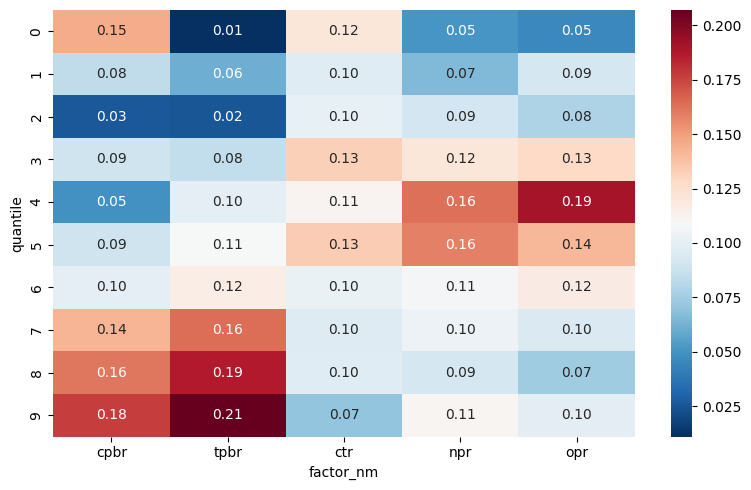

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.heatmap(analysis_1d_pivot, fmt=".2f", annot=True, cmap="RdBu_r")
plt.tight_layout()
plt.show()

In [22]:
analysis_2d = analyze_factors(df, factors, "target", 2, 6)

In [23]:
d2_combs = combinations(factors, 2)

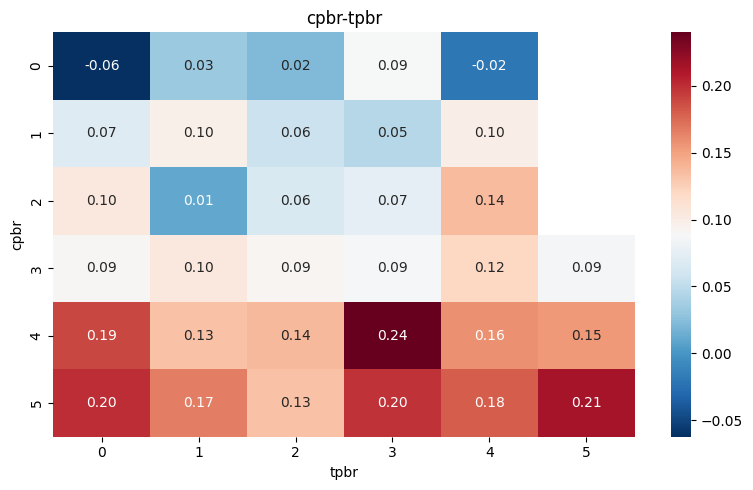

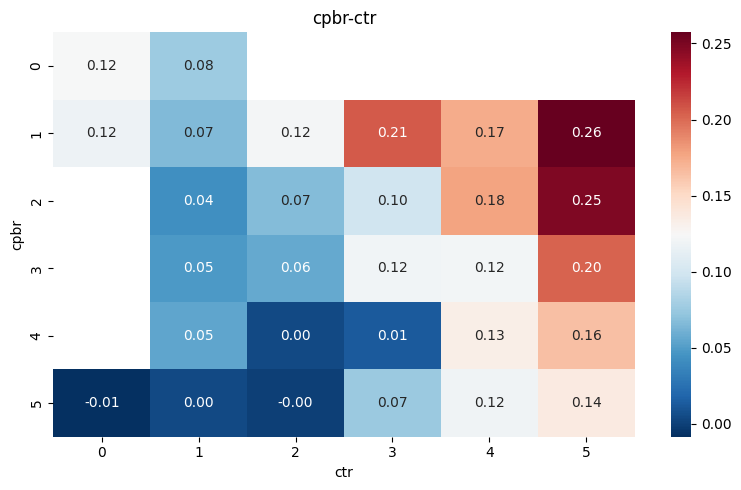

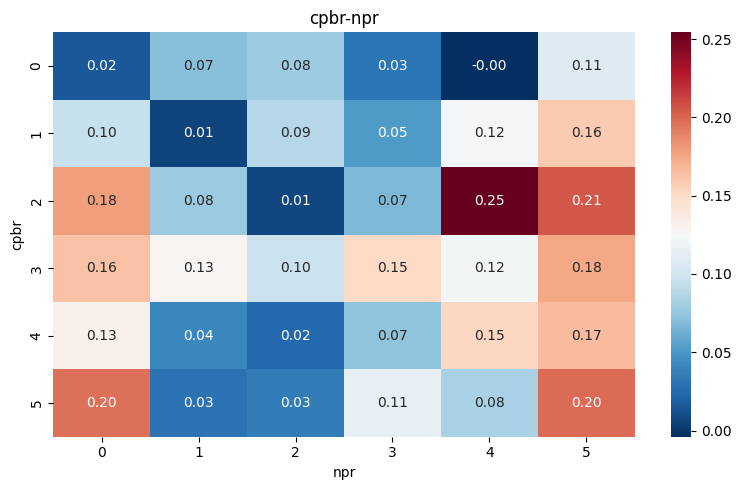

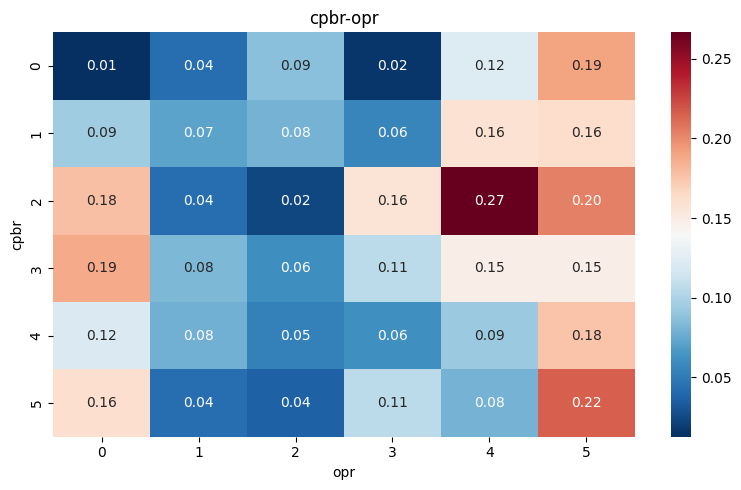

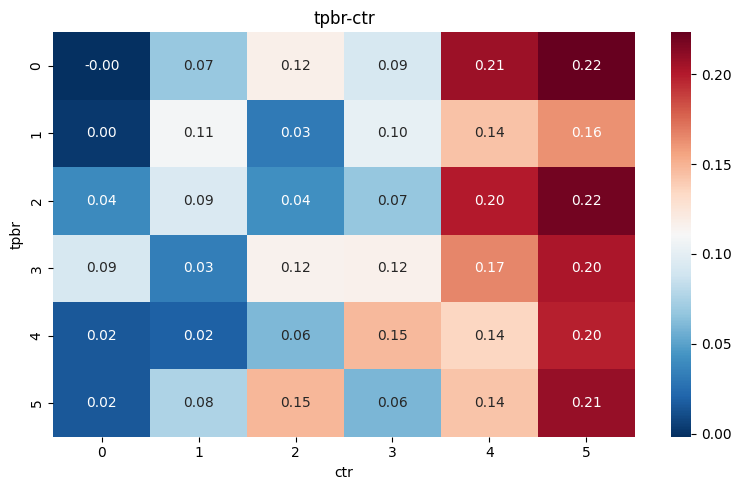

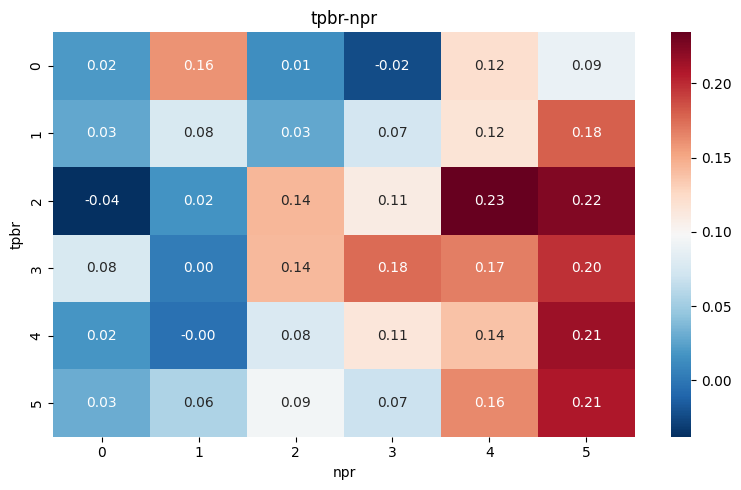

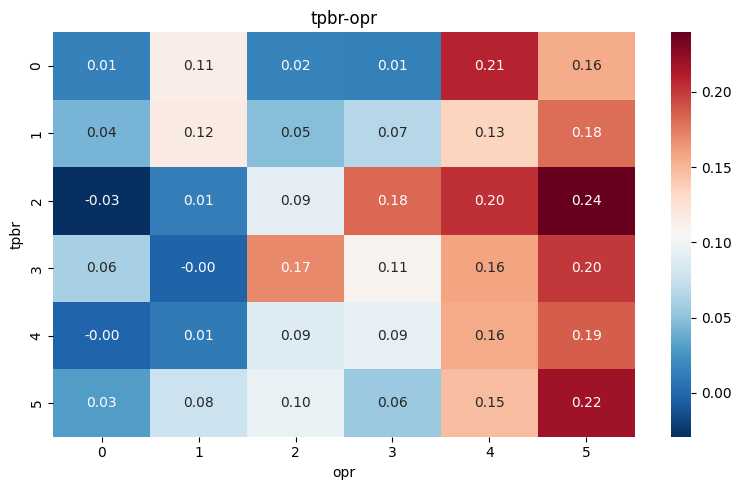

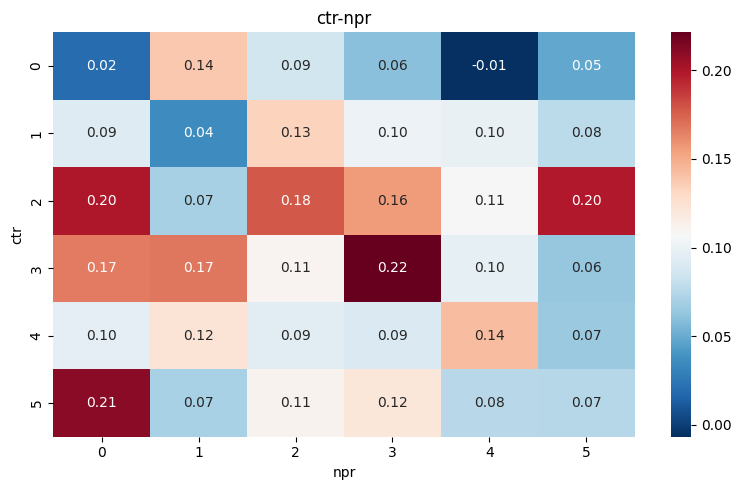

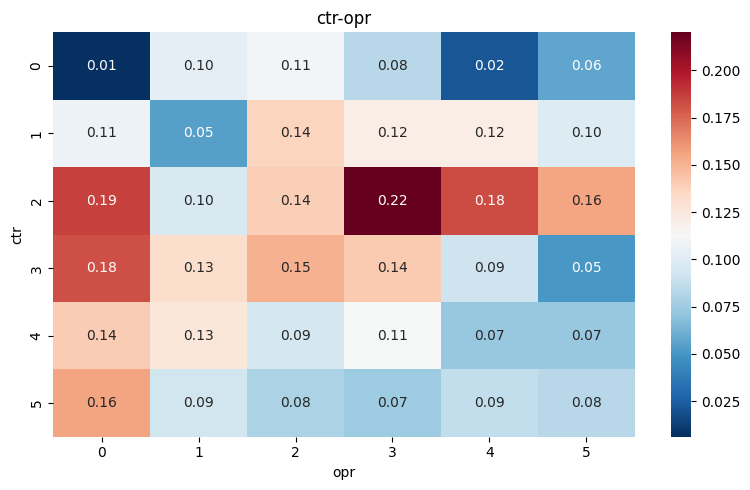

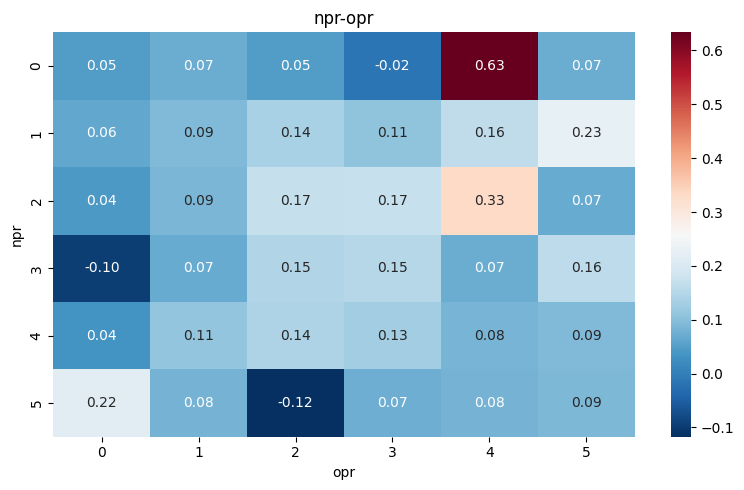

In [24]:
for d2_comb in d2_combs:
    a, b = d2_comb
    _analysis_2d = analysis_2d[
        analysis_2d["factor"].apply(lambda x: (a in x.keys()) and (b in x.keys()))
    ].copy()
    _analysis_2d[a] = _analysis_2d["factor"].apply(lambda x: x[b])
    _analysis_2d[b] = _analysis_2d["factor"].apply(lambda x: x[a])
    pivot_table = _analysis_2d.pivot(index=a, columns=b, values="mean")
    plt.figure(figsize=(8, 5))
    sns.heatmap(pivot_table, fmt=".2f", annot=True, cmap="RdBu_r")
    plt.title(f"{a}-{b}")
    plt.tight_layout()
    plt.show()

In [25]:
# heatmap에서 인상적인부분을 자동으로 찾을 수 있을까?